<a href="https://colab.research.google.com/github/Madmins07/Time-series-models/blob/main/ARIMA_USD_INR_PREDICTOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
df = pd.read_csv("data.csv")

<Axes: >

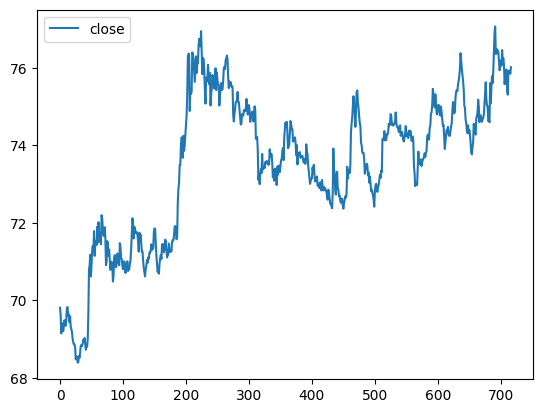

In [ ]:
df.rename(columns={'DEXINUS': 'close'}, inplace=True)
df.plot()

In [ ]:
df = df.drop('observation_date', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   717 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df.close)
print(result[0])
print(result[1])

-2.172307807110745
0.21644917518335788


In [ ]:
msk = (df.index < len(df)-30)
df_train = df[msk].copy()
df_test = df[~msk].copy()


In [ ]:
df_train.shape

(687, 1)

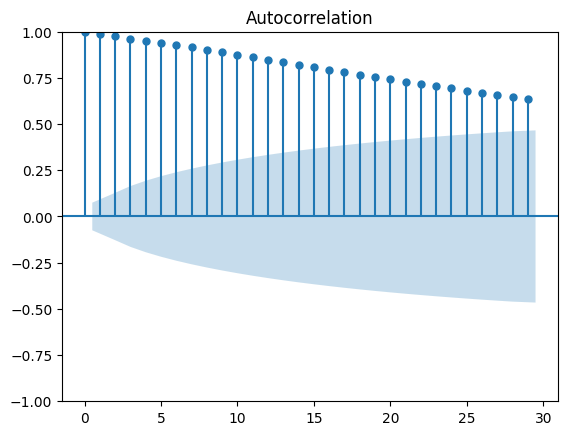

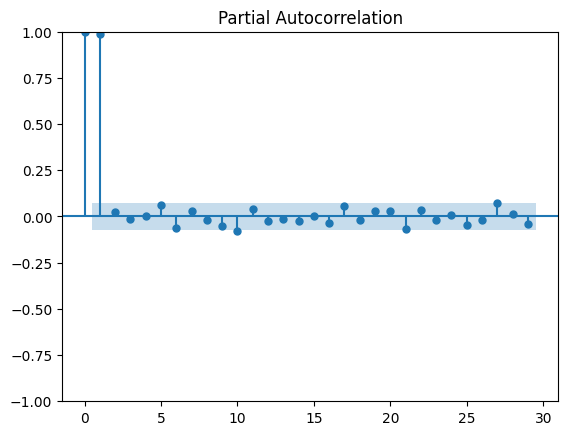

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(df_train.close)

pacf_original = plot_pacf(df_train.close)

<Axes: >

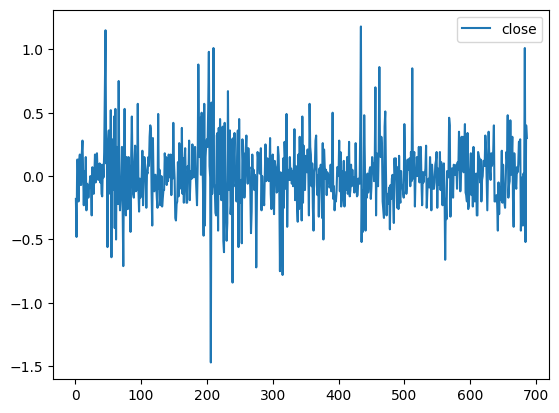

In [ ]:
df_train_diff = df_train.diff().dropna()
df_train_diff.plot()

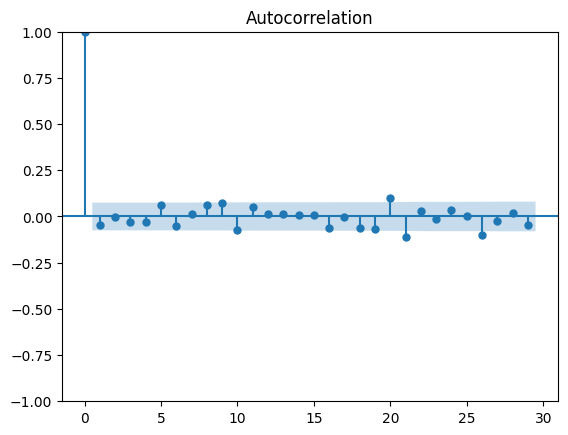

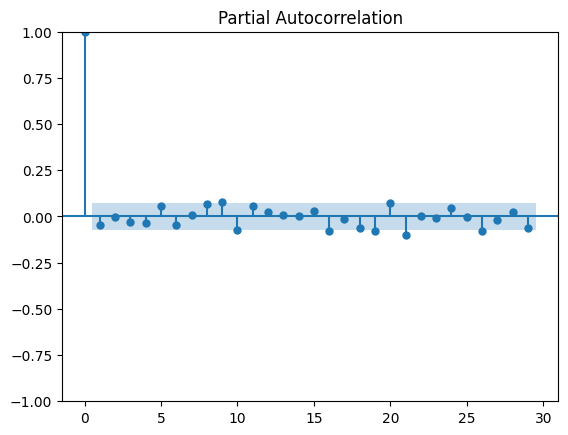

In [ ]:
acf_diff = plot_acf(df_train_diff)

pacf_diff = plot_pacf(df_train_diff)

In [ ]:
adf_test = adfuller(df_train_diff)
print(f'p-value: {adf_test[1]}')
df_train = pd.DataFrame(df_train)


p-value: 2.642113605272985e-08


In [ ]:
df_train = np.array(df_train)
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_train, order=(2,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  687
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 -46.725
Date:                Sun, 02 Jun 2024   AIC                             99.450
Time:                        16:38:47   BIC                            113.042
Sample:                             0   HQIC                           104.709
                                - 687                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0444      0.031     -1.411      0.158      -0.106       0.017
ar.L2         -0.0041      0.041     -0.101      0.920      -0.084       0.076
sigma2         0.0671      0.002     30.483      0.0

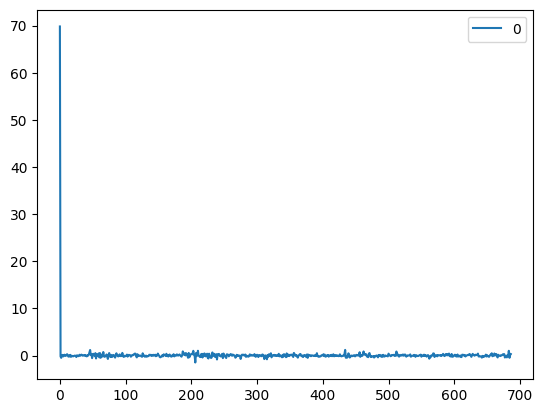

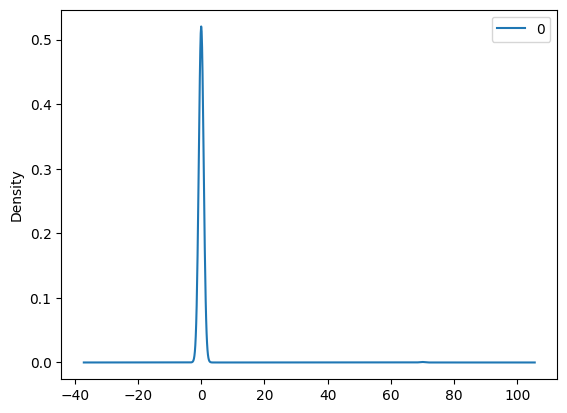

                0
count  687.000000
mean     0.110719
std      2.675622
min     -1.470117
25%     -0.134603
50%     -0.000537
75%      0.143741
max     69.810000


In [ ]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())